# Requirements

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
# Add as many imports as you need.

# Laboratory Exercise - Run Mode (8 points)

## Introduction
In this laboratory assignment, the focus is on time series forecasting, specifically targeting the prediction of the current **average sea-level pressure** in the city of Skopje. Your task involves employing bagging and boosting methods to forecast the average sea-level pressure. To accomplish this, you will use data from the preceding three days, consisting of average, minimal, and maximal temperatures, precipitation, as well as wind direction and speed, and the current season. By applying these ensemble learning techniques, you aim to enhance the accuracy and reliability of your predictions, gaining valuable insights into the temporal dynamics of sea-level pressure based on the given meteorological variables.

**Note: You are required to perform this laboratory assignment on your local machine.**

## The Weather Dataset

## Downloading the Weather Dataset

In [55]:
! pip install gdown==v4.6.3

In [56]:
!gdown 1F8hSJgpOTdoe9rhFj6DYiwmPZ5hJ-ubI # Download the dataset.

Downloading...
From: https://drive.google.com/uc?id=1F8hSJgpOTdoe9rhFj6DYiwmPZ5hJ-ubI
To: /content/weather.csv
100% 63.3k/63.3k [00:00<00:00, 8.91MB/s]


## Exploring the Weather Dataset
This dataset consits of daily weather records for the city of Skopje from January 1, 2021, to August 1, 2023. Each entry includes a unique station ID, city name, date, corresponding season (e.g., summer, winter), and various meteorological parameters such as average, minimum, and maximum temperatures in Celsius, precipitation in millimeters, average wind direction in degrees, average wind speed in kilometers per hour, and average sea-level pressure in hectopascals. The dataset offers comprehensive insights into the climatic conditions, allowing for analysis and exploration of weather patterns in Skopje over the specified time period.

The dataset comprises the following columns:
- station_id - unique ID for the weather station,
- city_name - name of the city where the station is located,
- date - date of the weather record,
- season - season corresponding to the date (e.g., summer, winter),
- avg_temp_c - average temperature in Celsius,
- min_temp_c - minimum temperature in Celsius,
- max_temp_c - maximum temperature in Celsius,
- precipitation_mm - precipitation in millimeters,
- avg_wind_dir_deg - average wind direction in degrees,
- avg_wind_speed_kmh - average wind speed in kilometers per hour, and
- avg_sea_level_pres_hpa - average sea-level pressure in hectopascals.

*Note: The dataset is complete, with no missing values in any of its entries.*

Load the dataset into a `pandas` data frame.

In [57]:
# Write your code here. Add as many boxes as you need.
df = pd.read_csv('/content/weather.csv')
df.head()

,station_id,city_name,date,season,avg_temp_c,min_temp_c,max_temp_c,precipitation_mm,avg_wind_dir_deg,avg_wind_speed_kmh,avg_sea_level_pres_hpa
0,13588,Skopje,2021-01-01,Winter,5.1,0.5,13.2,0.0,330.0,5.9,1021.2
1,13588,Skopje,2021-01-02,Winter,3.0,-2.6,11.2,0.0,330.0,5.9,1021.2
2,13588,Skopje,2021-01-03,Winter,6.8,3.5,12.5,1.3,339.0,8.0,1017.8
3,13588,Skopje,2021-01-04,Winter,6.6,6.1,7.2,3.6,298.0,5.3,1011.3
4,13588,Skopje,2021-01-05,Winter,4.3,2.3,6.7,4.6,11.0,5.1,1014.5


Explore the dataset using visualizations of your choice.

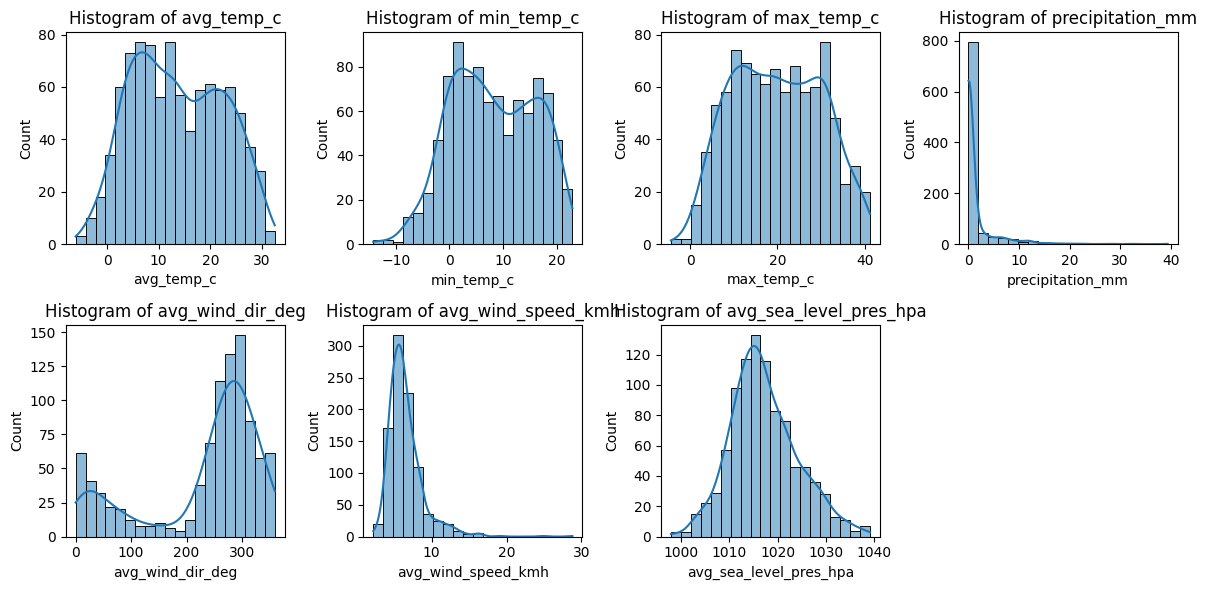

In [58]:
plt.figure(figsize=(12, 6))

numeric_variables = ['avg_temp_c', 'min_temp_c', 'max_temp_c', 'precipitation_mm', 'avg_wind_dir_deg', 'avg_wind_speed_kmh', 'avg_sea_level_pres_hpa']
for col in numeric_variables:
    plt.subplot(2, 4, numeric_variables.index(col) + 1)
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(f'Histogram of {col}')

plt.tight_layout()
plt.show()

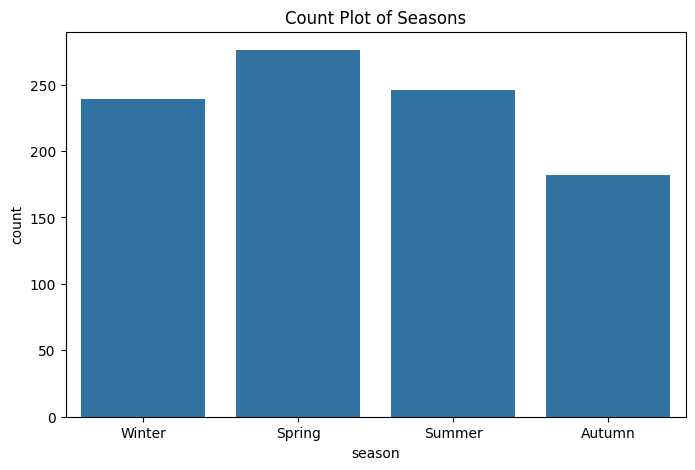

In [59]:
plt.figure(figsize=(8, 5))
sns.countplot(x='season', data=df)
plt.title('Count Plot of Seasons')
plt.show()

Remove the highly correlated features.

In [60]:
# Write your code here. Add as many boxes as you need.
correlation_matrix = df.corr()

<ipython-input-60-87b7480f9529>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


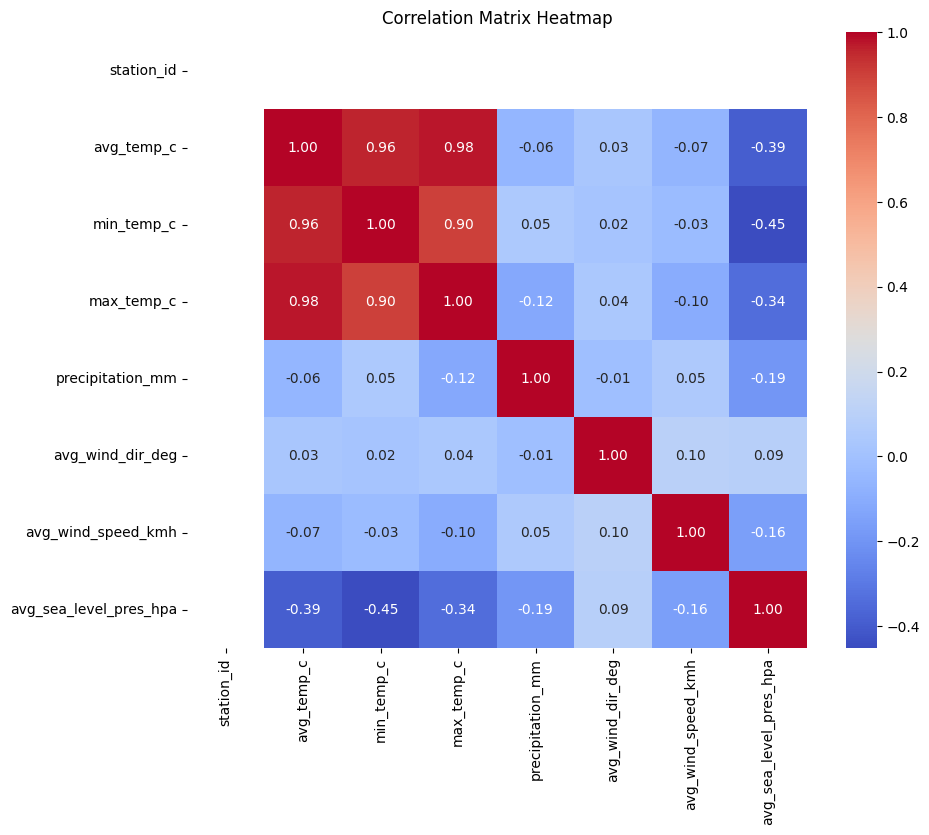

In [61]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [62]:
import numpy as np

correlation_threshold = 0.8

upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(np.bool))
highly_correlated_features = [column for column in upper_triangle.columns if any(upper_triangle[column] > correlation_threshold)]

<ipython-input-62-42e55b2fbda2>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(np.bool))


In [63]:
df = df.drop(columns=highly_correlated_features)
df

,station_id,city_name,date,season,avg_temp_c,precipitation_mm,avg_wind_dir_deg,avg_wind_speed_kmh,avg_sea_level_pres_hpa
0,13588,Skopje,2021-01-01,Winter,5.1,0.0,330.0,5.9,1021.2
1,13588,Skopje,2021-01-02,Winter,3.0,0.0,330.0,5.9,1021.2
2,13588,Skopje,2021-01-03,Winter,6.8,1.3,339.0,8.0,1017.8
3,13588,Skopje,2021-01-04,Winter,6.6,3.6,298.0,5.3,1011.3
4,13588,Skopje,2021-01-05,Winter,4.3,4.6,11.0,5.1,1014.5
...,...,...,...,...,...,...,...,...,...
938,13588,Skopje,2023-07-28,Summer,22.8,0.0,2.0,6.8,1014.6
939,13588,Skopje,2023-07-29,Summer,26.3,0.0,261.0,6.2,1011.7
940,13588,Skopje,2023-07-30,Summer,28.2,0.0,317.0,8.0,1009.8
941,13588,Skopje,2023-07-31,Summer,25.8,0.0,307.0,12.3,1010.9


<ipython-input-64-7baa59ca21e6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix_filtered = df.corr()


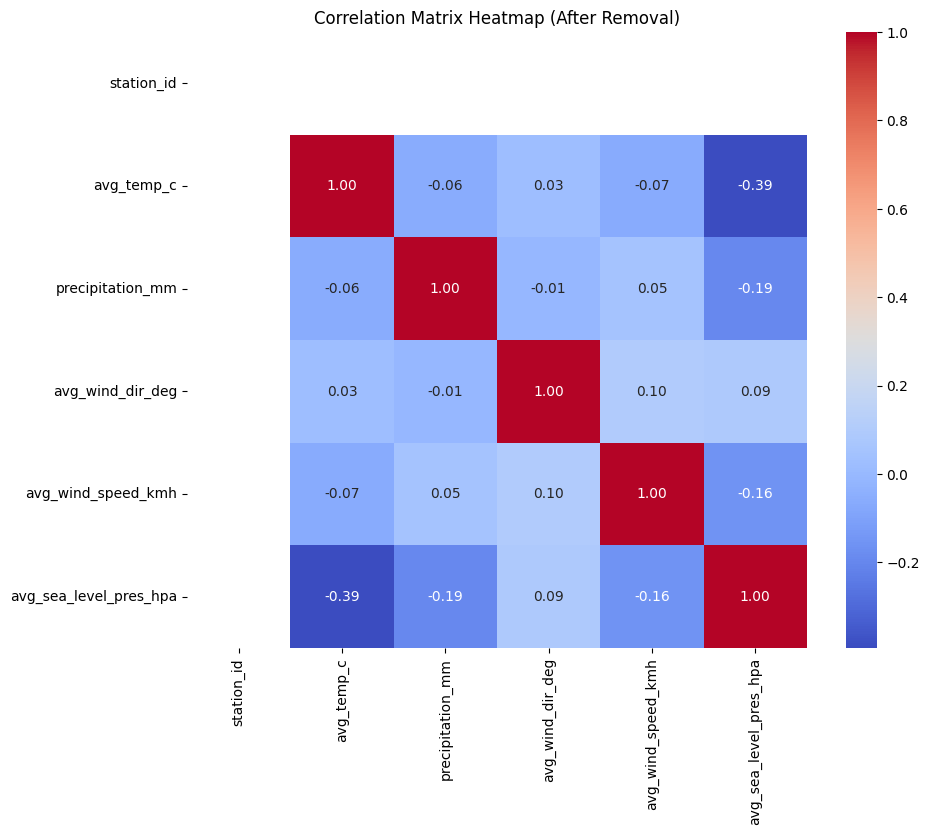

In [64]:
correlation_matrix_filtered = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_filtered, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap (After Removal)')
plt.show()

Encode the categorical features.

In [65]:
# Write your code here. Add as many boxes as you need.
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

# df['city_name'] = encoder.fit_transform(df['city_name'])
df['season'] = encoder.fit_transform(df['season'])
df

,station_id,city_name,date,season,avg_temp_c,precipitation_mm,avg_wind_dir_deg,avg_wind_speed_kmh,avg_sea_level_pres_hpa
0,13588,Skopje,2021-01-01,3,5.1,0.0,330.0,5.9,1021.2
1,13588,Skopje,2021-01-02,3,3.0,0.0,330.0,5.9,1021.2
2,13588,Skopje,2021-01-03,3,6.8,1.3,339.0,8.0,1017.8
3,13588,Skopje,2021-01-04,3,6.6,3.6,298.0,5.3,1011.3
4,13588,Skopje,2021-01-05,3,4.3,4.6,11.0,5.1,1014.5
...,...,...,...,...,...,...,...,...,...
938,13588,Skopje,2023-07-28,2,22.8,0.0,2.0,6.8,1014.6
939,13588,Skopje,2023-07-29,2,26.3,0.0,261.0,6.2,1011.7
940,13588,Skopje,2023-07-30,2,28.2,0.0,317.0,8.0,1009.8
941,13588,Skopje,2023-07-31,2,25.8,0.0,307.0,12.3,1010.9


# Feauture Extraction
Select the relevant features for prediction and apply a lag of one, two, and three days to each chosen feature (except `season`), creating a set of features representing the meteorological conditions from the previous three days. To maintain dataset integrity, eliminate any resulting missing values at the beginning of the dataset.

Hint: Use `df['column_name'].shift(period)`. Check the documentation at https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shift.html.

In [66]:
# Write your code here. Add as many boxes as you need.
df = df.set_index('date')
df = df.sort_index()

In [67]:
lag = 3
# avg_temp_c	precipitation_mm	avg_wind_dir_deg	avg_wind_speed_kmh	avg_sea_level_pres_hpa
for i in range(1, lag + 1):
  df[f'avg_temp_c_prev{i}'] = df['avg_temp_c'].shift(i)
  df[f'precipitation_mm_prev{i}'] = df['precipitation_mm'].shift(i)
  df[f'avg_wind_dir_deg_prev{i}'] = df['avg_wind_dir_deg'].shift(i)
  df[f'avg_wind_speed_kmh_prev{i}'] = df['avg_wind_speed_kmh'].shift(i)
  df[f'avg_sea_level_pres_hpa_prev{i}'] = df['avg_sea_level_pres_hpa'].shift(i)

df

,station_id,city_name,season,avg_temp_c,precipitation_mm,avg_wind_dir_deg,avg_wind_speed_kmh,avg_sea_level_pres_hpa,avg_temp_c_prev1,precipitation_mm_prev1,...,avg_temp_c_prev2,precipitation_mm_prev2,avg_wind_dir_deg_prev2,avg_wind_speed_kmh_prev2,avg_sea_level_pres_hpa_prev2,avg_temp_c_prev3,precipitation_mm_prev3,avg_wind_dir_deg_prev3,avg_wind_speed_kmh_prev3,avg_sea_level_pres_hpa_prev3
date,,,,,,,,,,,,,,,,,,,,,
2021-01-01,13588,Skopje,3,5.1,0.0,330.0,5.9,1021.2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-02,13588,Skopje,3,3.0,0.0,330.0,5.9,1021.2,5.1,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-03,13588,Skopje,3,6.8,1.3,339.0,8.0,1017.8,3.0,0.0,...,5.1,0.0,330.0,5.9,1021.2,NaN,NaN,NaN,NaN,NaN
2021-01-04,13588,Skopje,3,6.6,3.6,298.0,5.3,1011.3,6.8,1.3,...,3.0,0.0,330.0,5.9,1021.2,5.1,0.0,330.0,5.9,1021.2
2021-01-05,13588,Skopje,3,4.3,4.6,11.0,5.1,1014.5,6.6,3.6,...,6.8,1.3,339.0,8.0,1017.8,3.0,0.0,330.0,5.9,1021.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-28,13588,Skopje,2,22.8,0.0,2.0,6.8,1014.6,20.7,0.0,...,28.2,0.0,242.0,13.4,1002.9,29.2,0.0,275.0,4.7,1007.7
2023-07-29,13588,Skopje,2,26.3,0.0,261.0,6.2,1011.7,22.8,0.0,...,20.7,0.0,316.0,16.0,1012.6,28.2,0.0,242.0,13.4,1002.9
2023-07-30,13588,Skopje,2,28.2,0.0,317.0,8.0,1009.8,26.3,0.0,...,22.8,0.0,2.0,6.8,1014.6,20.7,0.0,316.0,16.0,1012.6


## Dataset Splitting
Partition the dataset into training and testing sets with an 80:20 ratio.

**WARNING: DO NOT SHUFFLE THE DATASET.**



In [79]:
# Write your code here. Add as many boxes as you need.
df.isnull().sum()

station_id                      0
city_name                       0
season                          0
avg_temp_c                      0
precipitation_mm                0
avg_wind_dir_deg                0
avg_wind_speed_kmh              0
avg_sea_level_pres_hpa          0
avg_temp_c_prev1                1
precipitation_mm_prev1          1
avg_wind_dir_deg_prev1          1
avg_wind_speed_kmh_prev1        1
avg_sea_level_pres_hpa_prev1    1
avg_temp_c_prev2                2
precipitation_mm_prev2          2
avg_wind_dir_deg_prev2          2
avg_wind_speed_kmh_prev2        2
avg_sea_level_pres_hpa_prev2    2
avg_temp_c_prev3                3
precipitation_mm_prev3          3
avg_wind_dir_deg_prev3          3
avg_wind_speed_kmh_prev3        3
avg_sea_level_pres_hpa_prev3    3
dtype: int64

In [80]:
df = df.dropna(axis=0)

In [84]:
features = []

for i in range(1, lag + 1):
  features.append(f'precipitation_mm_prev{i}')
  features.append(f'avg_wind_dir_deg_prev{i}')
  features.append(f'avg_wind_speed_kmh_prev{i}')
  features.append(f'avg_sea_level_pres_hpa_prev{i}')
features

['precipitation_mm_prev1',
 'avg_wind_dir_deg_prev1',
 'avg_wind_speed_kmh_prev1',
 'avg_sea_level_pres_hpa_prev1',
 'precipitation_mm_prev2',
 'avg_wind_dir_deg_prev2',
 'avg_wind_speed_kmh_prev2',
 'avg_sea_level_pres_hpa_prev2',
 'precipitation_mm_prev3',
 'avg_wind_dir_deg_prev3',
 'avg_wind_speed_kmh_prev3',
 'avg_sea_level_pres_hpa_prev3']

In [88]:
X, Y = df[features], df['avg_temp_c']

In [89]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)

## Ensemble Learning Methods

### Bagging

Create an instance of a Random Forest model and train it using the `fit` function.

In [102]:
# Write your code here. Add as many boxes as you need.
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=1500, criterion='squared_error', max_depth=10)

rf.fit(X_train, Y_train)

RandomForestRegressor(max_depth=10, n_estimators=1500)

Use the trained model to make predictions for the test set.

In [103]:
# Write your code here. Add as many boxes as you need.
rf_pred = rf.predict(X_test)

Assess the performance of the model by using different metrics provided by the `scikit-learn` library.

In [104]:
# Write your code here. Add as many boxes as you need.
from sklearn.metrics import mean_squared_error, r2_score

mean_squared_error(Y_test, rf_pred)

45.569989476821405

In [105]:
r2_score(Y_test, rf_pred)

0.3073587008957419

### Boosting

Create an instance of an XGBoost model and train it using the `fit` function.

In [107]:
# Write your code here. Add as many boxes as you need.
from xgboost import XGBRegressor

xgb = XGBRegressor(objective ='reg:linear',
    colsample_bytree = 0.3, learning_rate = 0.1,
    max_depth = 5, alpha = 2, n_estimators = 10)

xgb.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:32:54] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


XGBRegressor(alpha=2, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=10, n_jobs=None,
             num_parallel_tree=None, ...)

Use the trained model to make predictions for the test set.

In [108]:
# Write your code here. Add as many boxes as you need.
xgb_pred = xgb.predict(X_test)

Assess the performance of the model by using different metrics provided by the `scikit-learn` library.

In [109]:
# Write your code here. Add as many boxes as you need.
mean_squared_error(Y_test, xgb_pred)

50.82906847688088

In [110]:
r2_score(Y_test, rf_pred)

0.3073587008957419

# Laboratory Exercise - Bonus Task (+ 2 points)

As part of the bonus task in this laboratory assignment, your objective is to fine-tune the number of estimators (`n_estimators`) for the XGBoost model using a cross-validation with grid search and time series split. This involves systematically experimenting with various values for `n_estimators` and evaluating the model's performance using cross-validation. Upon determining the most suitable `n_estimators` value, evaluate the model's performance on a test set for final assessment.

Hints:
- For grid search use the `GridCVSearch` from the `scikit-learn` library. Check the documentation at https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html.
- For cross-validation use the `TimeSeriesSplit` from the `scikit-learn` library. Check the documentation at https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html.

## Dataset Splitting
Partition the dataset into training and testing sets with an 90:10 ratio.

**WARNING: DO NOT SHUFFLE THE DATASET.**

In [112]:
# Write your code here. Add as many boxes as you need.
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, test_size=0.1, shuffle=False)

## Fine-tuning the XGBoost Hyperparameter
Experiment with various values for `n_estimators` and evaluate the model's performance using cross-validation.

In [115]:
# Write your code here. Add as many boxes as you need.
from sklearn.model_selection import GridSearchCV


xgb_model = XGBRegressor(objective='reg:squarederror')

param_grid = {
    'n_estimators': [50, 100, 200, 300, 400, 500],
}

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='r2', cv=5)
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'n_estimators': [50, 100, 200, 300, 400, 500]},
             scoring='r2')

In [117]:
best_n_estimators = grid_search.best_params_['n_estimators']
best_n_estimators

50

In [119]:
final_model = XGBRegressor(objective='reg:squarederror', n_estimators=best_n_estimators)
final_model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=50, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

## Final Assessment of the Model Performance
Upon determining the most suitable `n_estimators` value, evaluate the model's performance on a test set for final assessment.

In [120]:
# Write your code here. Add as many boxes as you need.
y_pred_valid = final_model.predict(X_valid)

r2_score(Y_valid, y_pred_valid)

0.3515685192837531